<a href="https://colab.research.google.com/github/minjae960/CNN_Exercise/blob/main/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import random

In [1]:
!git clone https://github.com/minjae960/CNN_Exercise.git

Cloning into 'CNN_Exercise'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [6]:
DIR = '/content/CNN_Exercise/CNT Sample'
CATEGORIES = ['No', 'Sonic']

In [ ]:
CNT_IMG = []

for category in CATEGORIES:
    Path = os.path.join(DIR, category)
    for file in os.listdir(Path):
        img_array = cv2.imread(os.path.join(Path, file), cv2.IMREAD_GRAYSCALE)
        CNT_IMG.append([img_array, CATEGORIES.index(category), file])

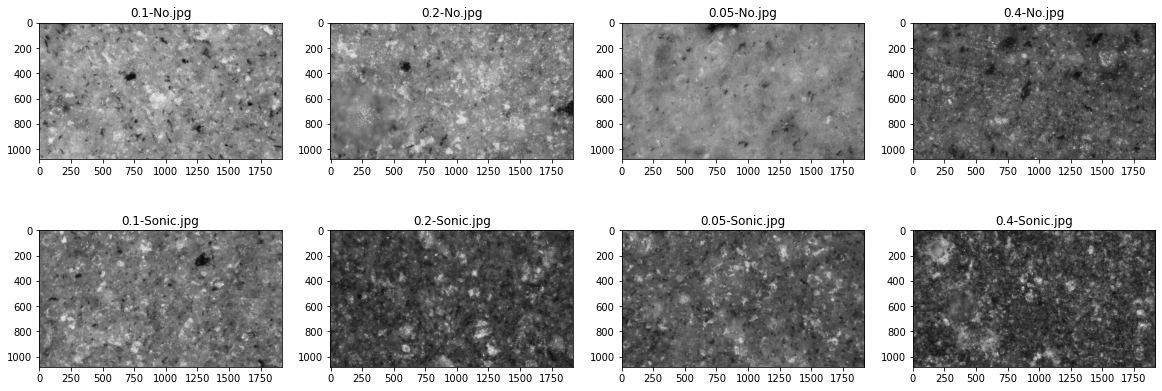

In [8]:
for i, data in enumerate(CNT_IMG):
    img_array = data[0]
    name = data[2]

    plt.rcParams["figure.figsize"] = (20,7)

    plt.subplot(2,4,i+1)
    plt.imshow(img_array, cmap='gray')
    plt.title(name)
    plt.show

In [9]:
n_row = 4
n_col = 6
img_size = 256

SMALL_IMG = []

for img_array, label, name in CNT_IMG:
    for i in range(n_row):
        for k in range(n_col):
            height = int(img_array.shape[0]/n_row)
            width = int(img_array.shape[1]/n_col)

            small_img = img_array[i*height:(i+1)*height, k*width:(k+1)*width]

            small_img = cv2.resize(small_img, (256, 256))

            small_img = small_img / 255.0

            SMALL_IMG.append([small_img, label, name])

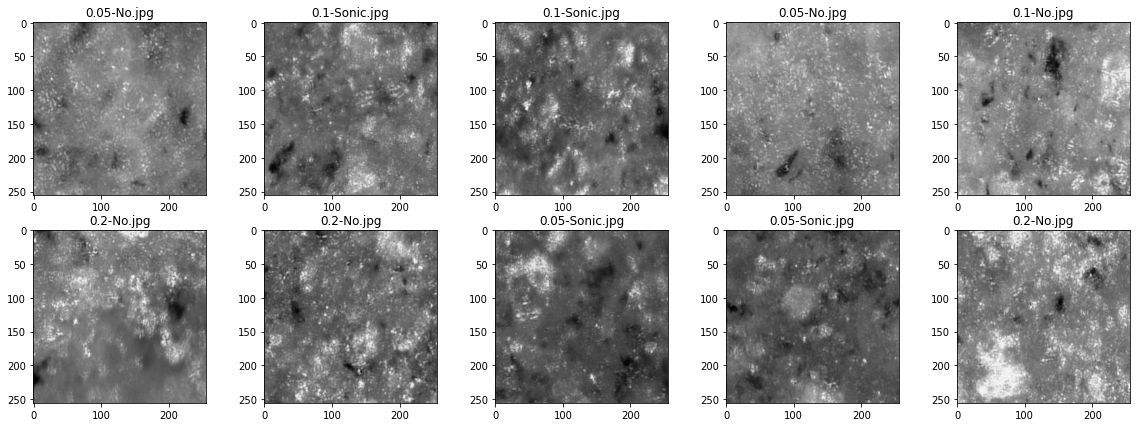

In [10]:
RANDOM_IMG = random.sample(SMALL_IMG, 10)

i=1

for img_array, label, name in RANDOM_IMG:
    

    plt.rcParams["figure.figsize"] = (20,7)

    plt.subplot(2,5,i)
    plt.imshow(img_array, cmap='gray')
    plt.title(name)
    plt.show

    i+=1

In [11]:
random.shuffle(SMALL_IMG)

In [12]:
Train_Data = SMALL_IMG[:160]
Test_Data = SMALL_IMG[160:]

print(len(Train_Data), len(Test_Data))

160 32


In [13]:
x_train = []
y_train = []

for img_array, label, name in Train_Data:
    x_train.append(img_array)
    y_train.append(label)

x_train = np.array(x_train).reshape(160, img_size, img_size, 1)
y_train = np.array(y_train)

print(x_train.shape, y_train.shape)

(160, 256, 256, 1) (160,)


In [19]:
#Build TensorFlow model -> CNN & sigmoid & binary
tf.model = tf.keras.Sequential()

#Conv1
tf.model.add(tf.keras.layers.Conv2D(filters=64, input_shape=(img_size,img_size,1), kernel_size=(3,3), 
                                    kernel_initializer='glorot_normal',activation='relu', padding='same'))
tf.model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), 
                                    kernel_initializer='glorot_normal',activation='relu', padding='same'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Conv2
tf.model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), kernel_initializer='glorot_normal', 
                                    activation='relu', padding='same'))
tf.model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), kernel_initializer='glorot_normal', 
                                    activation='relu', padding='same'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Fully Connected
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=1, kernel_initializer='glorot_normal', activation='sigmoid'))

tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
tf.model.summary()

#Train
history = tf.model.fit(x_train, y_train, validation_split=0.1, batch_size=100, epochs=40)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 64)      640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 524288)           

In [20]:
x_test = []
y_test = []

for img_array, label, name in Test_Data:
    x_test.append(img_array)
    y_test.append(label)

x_test = np.array(x_test).reshape(32, img_size, img_size, 1)
y_test = np.array(y_test)

print(x_test.shape, y_test.shape)

(32, 256, 256, 1) (32,)


In [21]:
Accuracy = tf.model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 214ms/step - loss: 0.6690 - accuracy: 0.5625


In [22]:
Prediction = []

for pred in tf.model.predict(x_test):
    if pred > 0.5:
        Prediction.append(1)
    else:
        Prediction.append(0)

[[1 1 1 0 0]
 [0 1 0 0 1]]


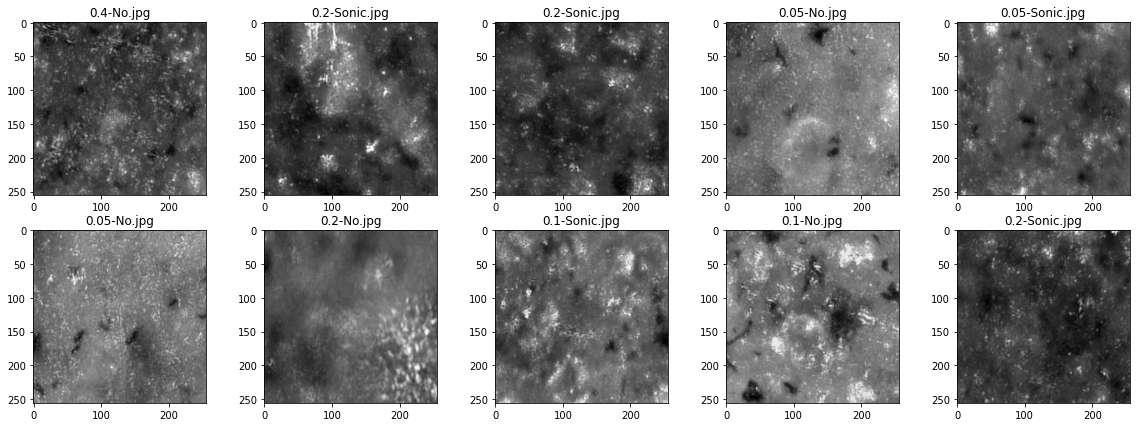

In [23]:
i = 1

for img_array, label, name in Test_Data[:10]:
    
    plt.rcParams["figure.figsize"] = (20,7)

    plt.subplot(2,5,i)
    plt.imshow(img_array, cmap='gray')
    plt.title(name)
    plt.show

    i+=1

print(np.array(Prediction[:10]).reshape(2,5))

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/CNT_96%_21k(2)")
model.summary()